In [1]:
# from sqlalchemy import create_engine
# import pymysql
# import config
# pymysql.lowercase = False
# from mysql.connector import connect
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# connection_string = f'mysql+pymysql://{config.username}:{config.password}@{config.host}/{config.database}'

In [3]:
# connection = connect(host=config.host, database=config.database,user=config.username, passwd=config.password,use_pure=False)
# df_users = pd.read_sql('SELECT ID, Age, GenderSelect, GenderText, Race, NativeLanguageSelect, NativeLanguageText, Nationality, Education, FieldOfEducation, MaritalStatus, EmployementStatus, WorkIndustry, DisabilitySelect, DisabilityText, Recruited, CreatedAt, UpdatedAt FROM users', con=connection)
# connection.close()

In [4]:
# connection = create_engine(connection_string)
# Masking the user's identity while reading into the table
# df_users = pd.read_sql('SELECT ID, Age, GenderSelect, GenderText, Race, NativeLanguageSelect, NativeLanguageText, Nationality, Education, FieldOfEducation, MaritalStatus, EmployementStatus, WorkIndustry, DisabilitySelect, DisabilityText, Recruited, CreatedAt, UpdatedAt FROM users', con=connection)
# df_conversations = pd.read_sql('SELECT * FROM conversations', con=connection)
# df_questionnaires = pd.read_sql('SELECT * FROM questionnaires', con=connection)
# df_errors = pd.read_sql('SELECT * FROM errors', con=connection)
# connection.close()

In [5]:
df_users = pd.read_csv('../../datasets/AWS-CSV-Exports/users.csv', sep=';')
df_conversations = pd.read_csv('../../datasets/AWS-CSV-Exports/conversations.csv', sep=';')
df_questionnaires = pd.read_csv('../../datasets/AWS-CSV-Exports/questionnaires.csv', sep=';')

In [6]:
# Total Users
print('Total Users:', len(df_users))

Total Users: 31


In [7]:
print('Number of conversations where users were waiting due to lack of mass users', len(df_conversations.loc[(df_conversations['PeerID'] == 0) & (df_conversations['UserID'] != 1)]))

Number of conversations where users were waiting due to lack of mass users 20


In [8]:
print('Usable conversations', len(df_conversations.loc[df_conversations['PeerID'] != 0]))

Usable conversations 43


In [9]:
df_conversations = df_conversations.loc[df_conversations['PeerID'] != 0]

In [10]:
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Information Technology (E.g. Computer Science, Information Systems, Other Information Technology)','Information Technology')
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Engineering and Related Technologies (E.g. Aeronautics, Manufacturing, Food Technology, Materials Science, Plant and Machine Maintenance)','Engineering')
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Architecture and Building (E.g. Architecture and Urban Environment, Building)','Architecture')
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Natural and Physical Sciences (E.g. Mathematics, Astronomy, Chemical, Earth, Biological, Other Natural and Physical Sciences)','Natural and Physical Sciences')
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Agriculture, Environmental and Related Studies (E.g. Crop Production, Animal Production and Management, Environmental Impact and Assessment)','Agriculture')
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Management and Commerce (E.g. Administration, Human Resources, Sales, Marketing, Financial Management, Human Behaviour and Time Management)','Management and Commerce')
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Mixed Field Programs (E.g. General Education, Social & Employment Skills, Literacy & Numeracy Skills, Social & Workplace Relationships)','Mixed Field Programs')
df_users['FieldOfEducation'] = df_users['FieldOfEducation'].replace('Health (E.g. Disease Processes and Mechanisms, Restoration and Maintenance of Health, Diagnosis, Principles and Practices of Public Health)','Health')

In [11]:
df_users['WorkIndustry'] = df_users['WorkIndustry'].replace('Computer and Information Systems (E.g. Computer Science, Information Systems, Other Information Technology)','Computer and Information Systems')
df_users['WorkIndustry'] = df_users['WorkIndustry'].replace('Utilities (E.g. Electric Power Generation, Transmission, Distribution, Natural Gas Distribution, Water, Sewage, Irrigation)','Utilities')
df_users['WorkIndustry'] = df_users['WorkIndustry'].replace('Other Services (E.g. Automotive & Electronics Repair & Maintenance, Personal Care Services, Cemeteries, Pet Care, Parking Lots)','Other Services')

In [12]:
df_users.head(3)

,ID,Age,GenderSelect,GenderText,Race,NativeLanguageSelect,NativeLanguageText,Nationality,Education,FieldOfEducation,MaritalStatus,EmployementStatus,WorkIndustry,DisabilitySelect,DisabilityText,Recruited,CreatedAt,UpdatedAt
0,1,24,Male/Man,NaN,"Asian, Non-Hispanic",Others – Specify,Marathi,India,Master's degree,Information Technology,Never married,Employed Part-Time,Computer and Information Systems,No,NaN,Contacted by an associate working on this appl...,2021-03-27 06:00:13.933000,2021-03-27 06:00:13.933000
1,2,24,A gender identity not listed here. Please specify,Agender,"White, Non-Hispanic",Chinese – Cantonese,NaN,Algeria,High school diploma or equivalent,Architecture,Never married,Employed Part-Time,Construction,Yes; Specify if yes,Colorblindness,Contacted by an associate working on this appl...,2021-03-27 06:01:00.783000,2021-03-27 06:01:00.783000
2,3,30,Male/Man,NaN,"Asian, Non-Hispanic",English,NaN,India,Master's degree,Engineering,Never married,Student,NaN,No,NaN,Contacted by an associate working on this appl...,2021-03-27 06:04:48.742000,2021-03-27 06:04:48.742000


/Users/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


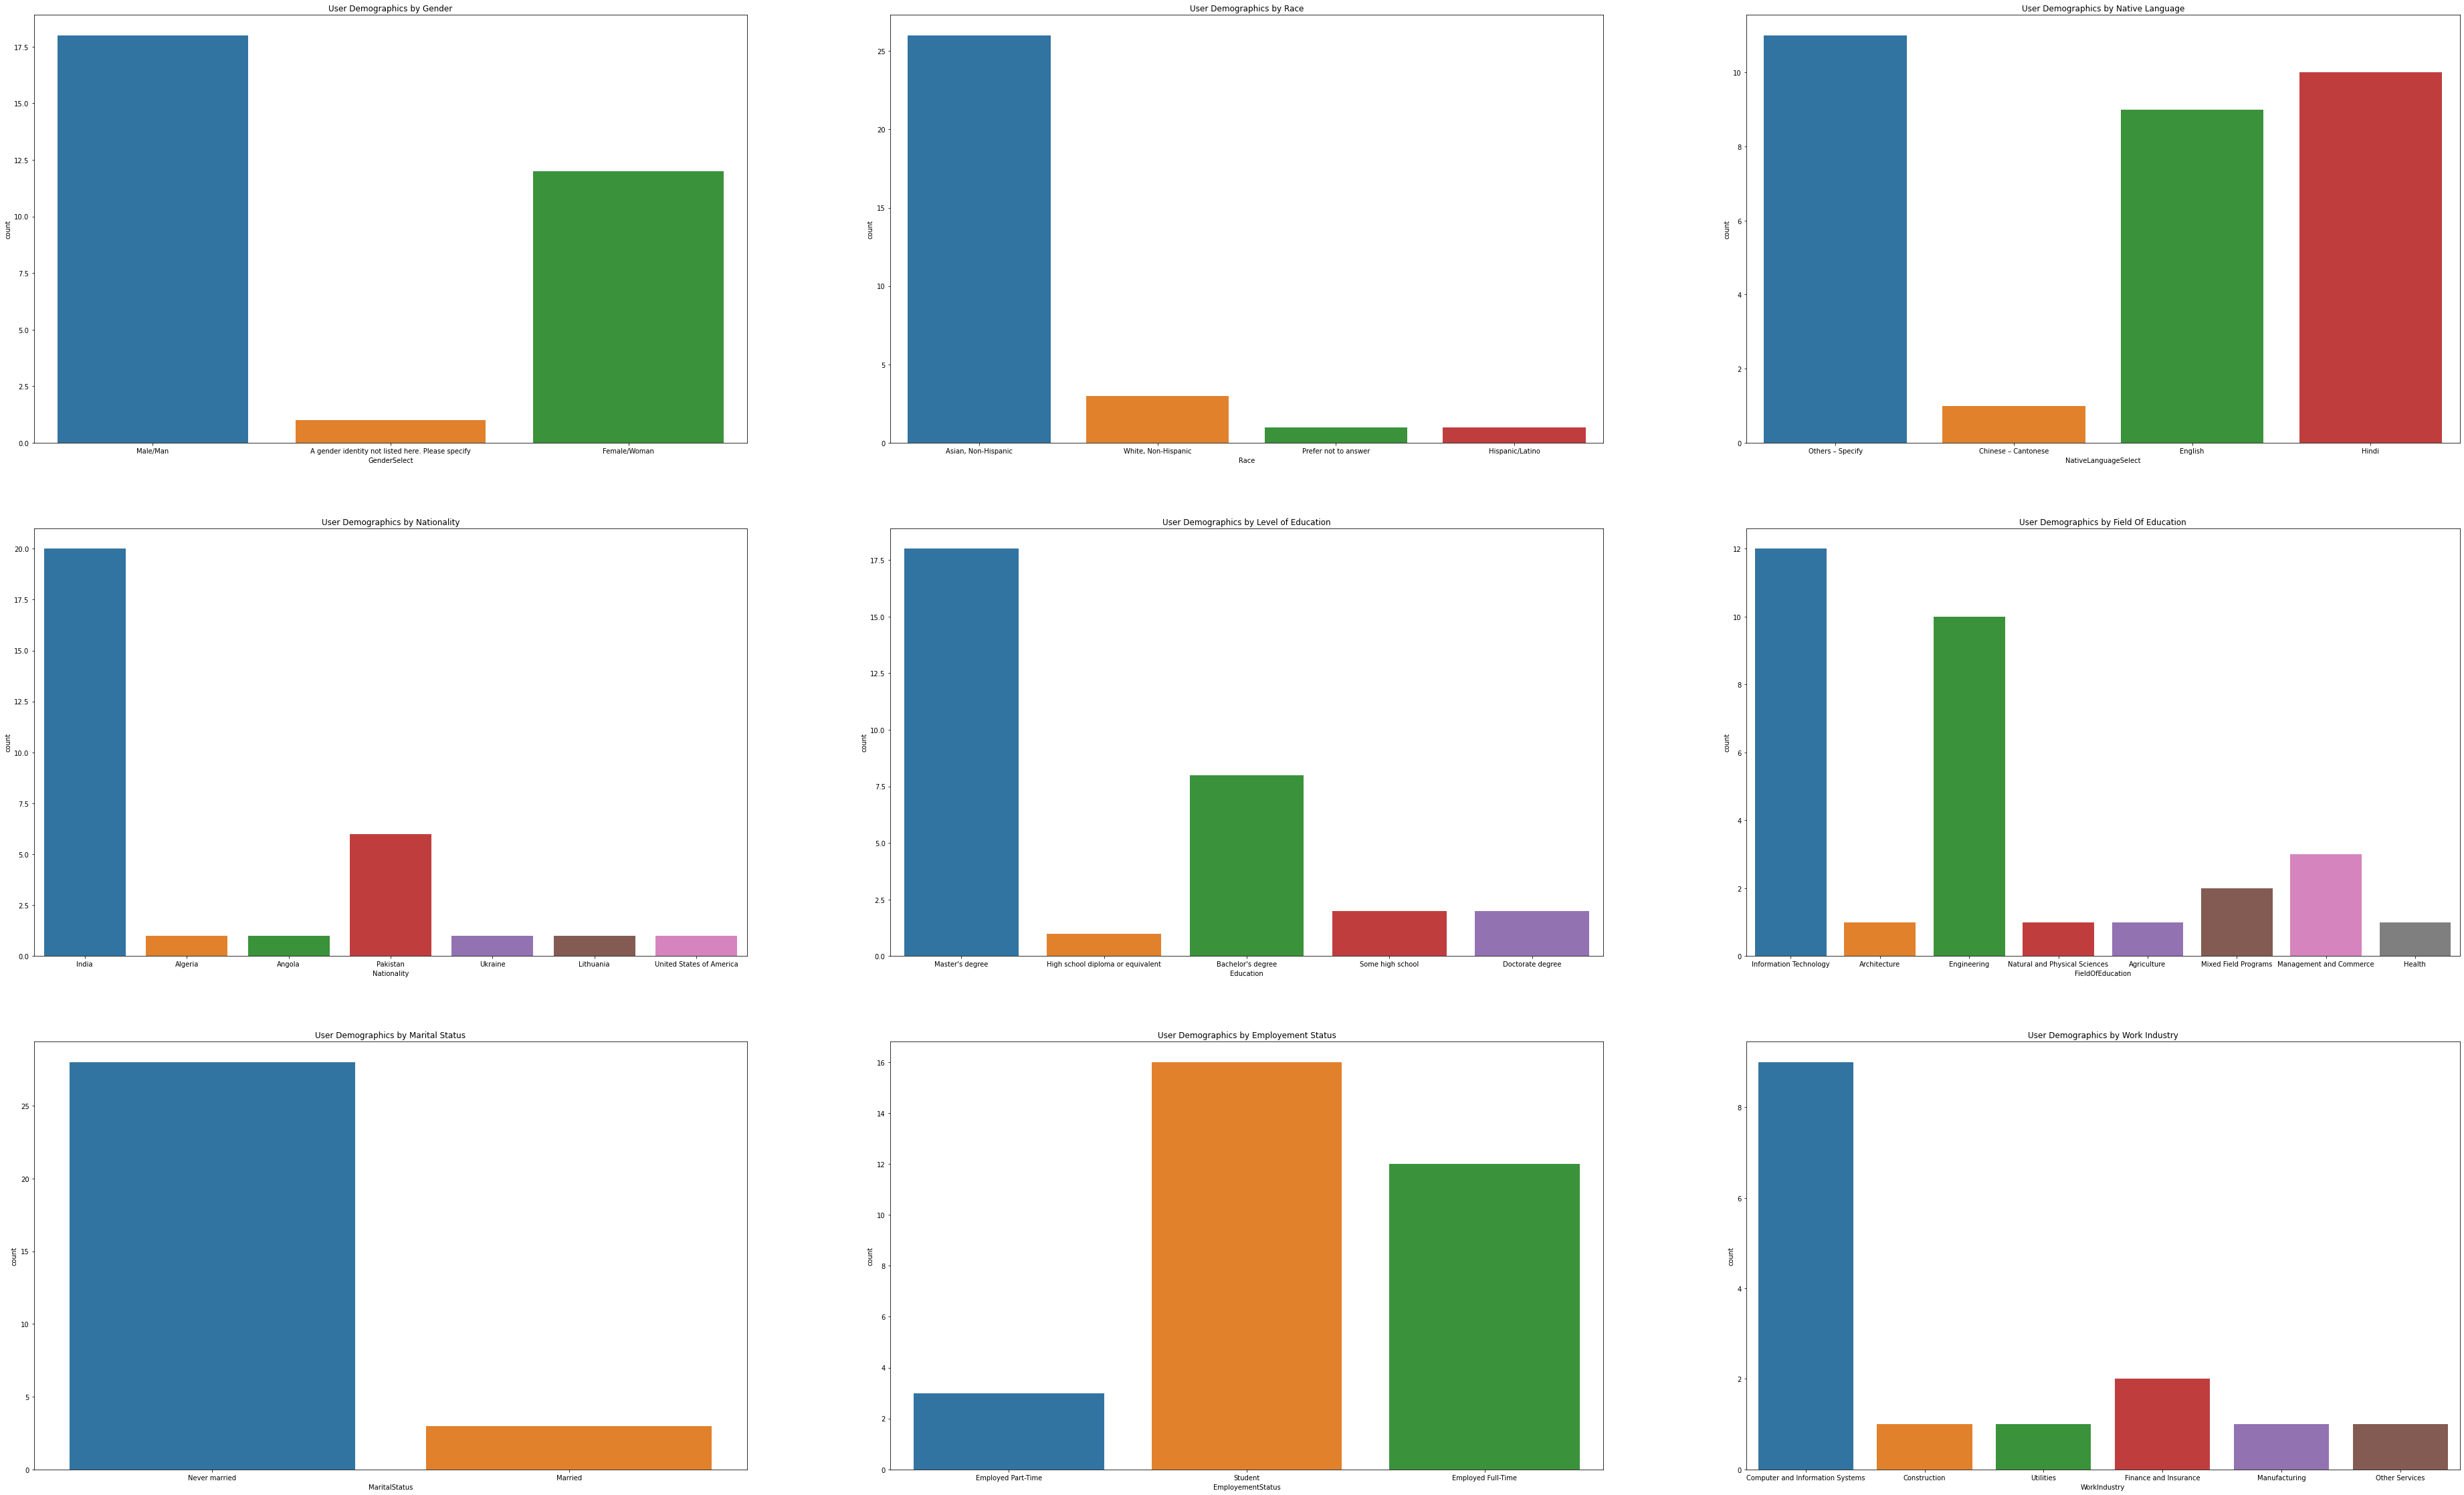

In [13]:
plot_size = (65,40)
fig, ax = plt.subplots(3,3, figsize=plot_size)

sns.countplot(x='GenderSelect', data=df_users, ax=ax[0, 0]).set_title('User Demographics by Gender')
sns.countplot(x='Race', data=df_users, ax=ax[0, 1]).set_title('User Demographics by Race')
sns.countplot(x='NativeLanguageSelect', data=df_users, ax=ax[0, 2]).set_title('User Demographics by Native Language')

sns.countplot(x='Nationality', data=df_users, ax=ax[1, 0]).set_title('User Demographics by Nationality')
sns.countplot(x='Education', data=df_users, ax=ax[1, 1]).set_title('User Demographics by Level of Education')
sns.countplot(x='FieldOfEducation', data=df_users, ax=ax[1, 2]).set_title('User Demographics by Field Of Education')

sns.countplot(x='MaritalStatus', data=df_users, ax=ax[2, 0]).set_title('User Demographics by Marital Status')
sns.countplot(x='EmployementStatus', data=df_users, ax=ax[2, 1]).set_title('User Demographics by Employement Status')
sns.countplot(x='WorkIndustry', data=df_users, ax=ax[2, 2]).set_title('User Demographics by Work Industry')

fig.show()

In [14]:
df_questionnaires.head(3)

,ID,ConversationID,ComfortableConversation,FeltUncomfortable,PartnerUnderstood,IUnderstood,AssistanceHelpful,AssistanceAnnoying,AssistanceAccurate,AssistanceWillHelp,IEnjoyed,IRecommend,BestParts,UncomfortableAspects,Suggestions,CreatedAt,UpdatedAt
0,1,1,0,0,0,0,0,0,0,0,0,0,The,Bots,Work,2021-03-27 06:01:59,2021-03-27 06:01:59
1,2,2,0,0,0,0,0,0,0,0,0,0,Yes,They,Do,2021-03-27 06:02:10,2021-03-27 06:02:10
2,3,4,3,1,0,3,2,-2,2,1,2,5,NaN,NaN,NaN,2021-03-27 06:08:36,2021-03-27 06:08:36


/Users/tejas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


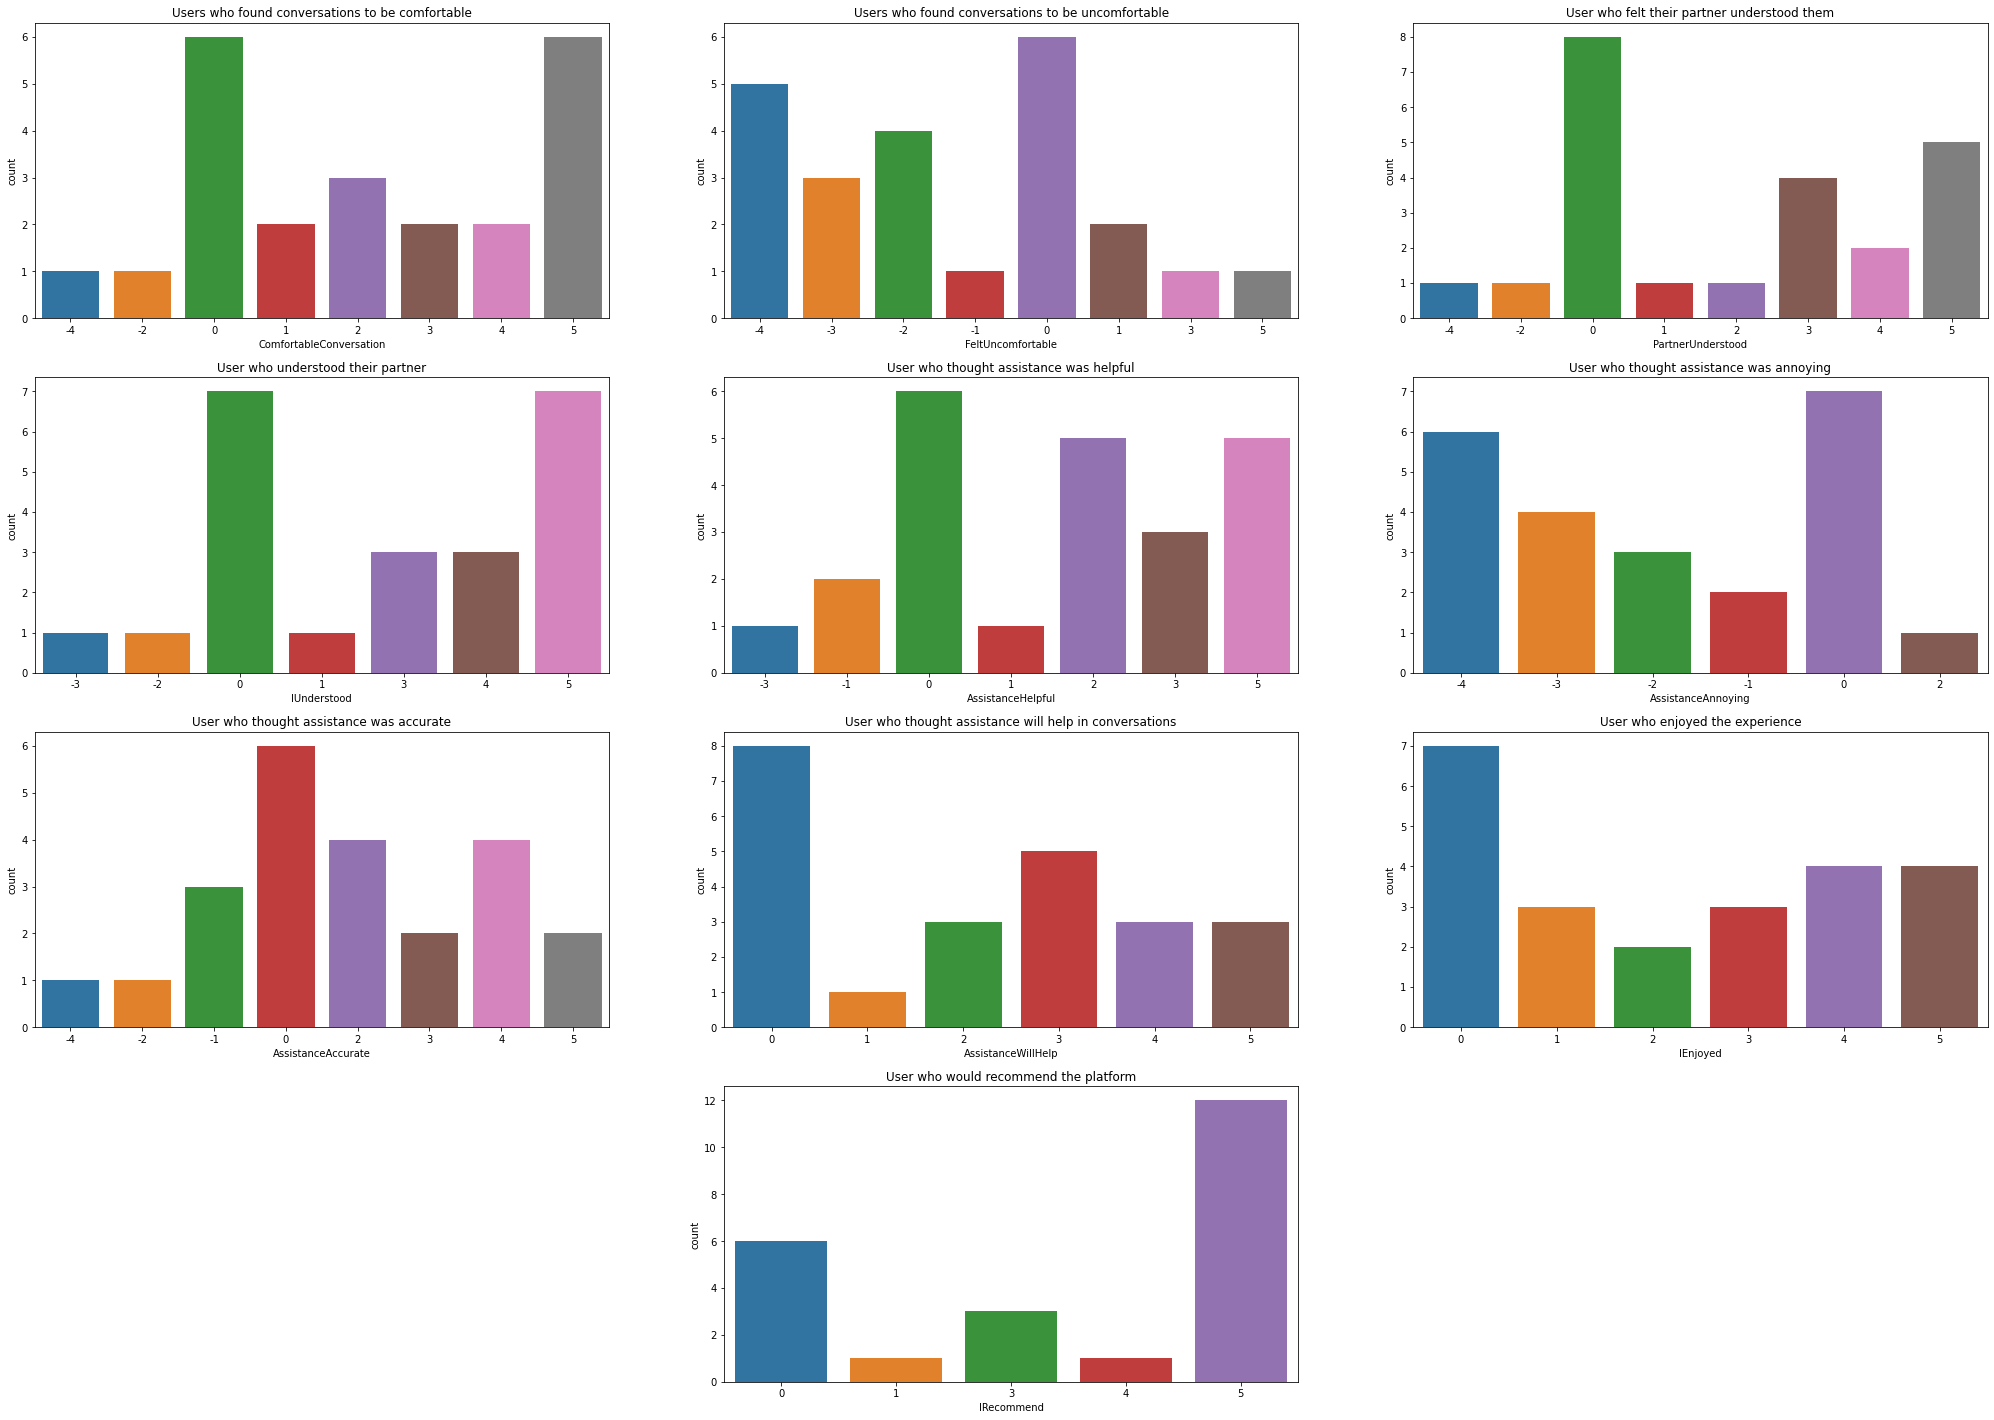

In [15]:
plot_size = (35,25)
fig, ax = plt.subplots(4,3, figsize=plot_size)

sns.countplot(x='ComfortableConversation', data=df_questionnaires, ax=ax[0, 0]).set_title('Users who found conversations to be comfortable')
sns.countplot(x='FeltUncomfortable', data=df_questionnaires, ax=ax[0, 1]).set_title('Users who found conversations to be uncomfortable')
sns.countplot(x='PartnerUnderstood', data=df_questionnaires, ax=ax[0, 2]).set_title('User who felt their partner understood them')

sns.countplot(x='IUnderstood', data=df_questionnaires, ax=ax[1, 0]).set_title('User who understood their partner')
sns.countplot(x='AssistanceHelpful', data=df_questionnaires, ax=ax[1, 1]).set_title('User who thought assistance was helpful')
sns.countplot(x='AssistanceAnnoying', data=df_questionnaires, ax=ax[1, 2]).set_title('User who thought assistance was annoying')

sns.countplot(x='AssistanceAccurate', data=df_questionnaires, ax=ax[2, 0]).set_title('User who thought assistance was accurate')
sns.countplot(x='AssistanceWillHelp', data=df_questionnaires, ax=ax[2, 1]).set_title('User who thought assistance will help in conversations')
sns.countplot(x='IEnjoyed', data=df_questionnaires, ax=ax[2, 2]).set_title('User who enjoyed the experience')

fig.delaxes(ax[3][0])
sns.countplot(x='IRecommend', data=df_questionnaires, ax=ax[3, 1]).set_title('User who would recommend the platform')
fig.delaxes(ax[3][2])

fig.show()

In [16]:
for item in df_questionnaires['BestParts'].dropna():
    print(item)

The
Yes
Good and relevant suggestions
The cinversational partner didn't get the messages correctly
The suggestions were witty and fun. Loved playing with them to engage in a conversation!
The suggestions were able to understand the context and provide the response. But the speed of the suggestions could be improved. The suggestions took a long while to be loaded
A good conversation should have peaks where everyone wishes to speak and present their opinions at the same time, and I would say this app finely fulfil that part. Appearance is good.
It kept the quite smooth other than few inaccuracies here and there
There were discussions on several topics and the bots were able to suggest things to talk about in every topic
Simple ui
I were not able to talk anyone. There were a statement that eating for a partner. No other option was working not even message
I liked that the advisor bot was sometimes able to predict what I wanted to say.
The suggestion was mostly accurate with respect to the

In [17]:
for item in df_questionnaires['UncomfortableAspects'].dropna():
    print(item)

Bots
They
None
Messages were being repeated and the suggestions took a long time to be loaded.
None.
The UI is a bit complicated and the message window was too distracting as it kept changing size. The suggestions took a long time to be loaded.
It was contradicting here and there
Sometimes when the conversation was not flowing pretty well and when I needed to switch topic, bots were not helpful.
Lack of direction
The advisor bot did not adapt to my current situation. For example, in my profile, I stated that I was a student but the bot suggested I respond with "Office was tough today" or something like that.
It was a little strange that some of my messages weren't going through to the other person
After a while, I stopped getting messages so I'm not sure if my partner left or if my chat box got stuck.


In [18]:
for item in df_questionnaires['Suggestions'].dropna():
    print(item)

Work
Do
Keep the login and register button at the bottom on the landing page, rather than navigating through the menu.
Improve the speed of suggestions being provided
Common grammatical improvements like capital letters like "I" in the sentences.
Still lacking in comprehending the conversation. requires attention in that.
More personal
Curate the suggestions to the profile standings.
The app could show a notification when the person receives the message
I would suggest to improve the time lag between messages sent and also perhaps alert the user if their partner is texting.


In [19]:
print('Total Conversations', len(df_conversations))

Total Conversations 43


In [20]:
print('Conversations where people chose not to answer questionnaires', (len(df_conversations) - len(df_questionnaires)))

Conversations where people chose not to answer questionnaires 20


In [21]:
df_conversations['Messages']

0     [{"message": "Hello", "senderID": 1, "createdA...
1     [{"message": "Hello", "senderID": 1, "createdA...
2     [{"message": "Hello there", "senderID": 1, "cr...
3     [{"message": "Hello there", "senderID": 1, "cr...
4     [{"message": "Hey", "senderID": 1, "createdAt"...
5     [{"message": "Hey", "senderID": 1, "createdAt"...
7     [{"message": "Test", "senderID": 1, "createdAt...
8     [{"message": "Test", "senderID": 1, "createdAt...
9     [{"message": "Test", "senderID": 1, "createdAt...
10    [{"message": "Test", "senderID": 1, "createdAt...
12    [{"message": "Hello friends", "senderID": 7, "...
13    [{"message": "Hello", "senderID": 1, "createdA...
14    [{"message": "Hello", "senderID": 8, "createdA...
15    [{"message": "Hey", "senderID": 1, "createdAt"...
19    [{"message": "Hi there", "senderID": 1, "creat...
20                                                   []
21    [{"message": "Hi", "senderID": 13, "createdAt"...
24    [{"message": "I am bit exhausted, I have b

In [22]:
# for similarities
import json

message_sent = []
bot_suggestions = []
clicked = []
exact_counter = 0
clicked_messages = []
previous_message = []
for conversn in df_conversations.Messages:
#     temp = message.strip('[]').split(',')
    temp = json.loads(conversn)
    if len(temp) > 0:
        for i, chat_item in enumerate(temp):
            
            if (i>0) and ((len(chat_item['botSuggestions'])>0) or ('nameOfBot' in chat_item.keys())):
                previous_message.append(temp[i-1]['message'])
                
                message_sent.append(chat_item['message'])
                suggestion = [item['reply'] for item in chat_item['botSuggestions']]
    #             bot_suggestions.append(chat_item['botSuggestions'])

                if 'nameOfBot' in chat_item.keys():
                    clicked.append(1)
                    if (len(suggestion)==0):
                        exact_counter += 1
                        suggestion = [chat_item['message']]
                        clicked_messages.append(suggestion)
                else:
                    clicked.append(0)

                bot_suggestions.append(suggestion)

In [23]:
_, counts = np.unique(clicked, return_counts=True)
print(counts)
print(exact_counter)

[82 82]
69


In [24]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/Users/tejas/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tejas/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tejas/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tejas/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [25]:
columns = ['previous_message', 'message_sent', 'suggestion', 'similarity_score']
similarity_df = pd.DataFrame(columns=columns)

In [26]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [27]:
def get_similarity_score(message1, message2):
    return cosine(sbert_model.encode([message1])[0], sbert_model.encode([message2])[0])

In [28]:
for previous_message, message, suggestions in zip(previous_message, message_sent, bot_suggestions):
#     suggestions_embeddings = sbert_model.encode(suggestions)
    for suggestion in suggestions:
        if len(suggestion)>0:
            sim = get_similarity_score(message, suggestion)
            similarity_df = similarity_df.append({'previous_message':previous_message, 'message_sent': message, 'suggestion': suggestion, 'similarity_score': sim}, ignore_index=True)
#             similarity_df = pd.concat([similarity_df, pd.DataFrame([message, suggestion, sim], columns=columns)])

In [29]:
similarity_df.sort_values(by='similarity_score', inplace=True)

In [30]:
message_frequency, counts = np.unique(clicked_messages, return_counts=True)
frequent_messages = {}
for i, msg in enumerate(message_frequency):
    if counts[i]>1:
        frequent_messages[msg] = counts[i]

In [31]:
best_performance = similarity_df[similarity_df['similarity_score']>0.8]
freq, counts = np.unique(best_performance['previous_message'], return_counts = True)
best_performance.head()

,previous_message,message_sent,suggestion,similarity_score
102,Yes the prediction takes time since the univer...,So you made it.,I hope you do!,0.811797
78,Thank you,awesome,"I know, but it's still a good idea.",0.823500
93,but this app seems require attention.,Its not quick to comprehend,I'm not sure what you mean by that.,0.826425
79,Thank you,awesome,You're welcome,0.827940
43,Hi,F U,Hiya,0.835709


In [42]:
print(len(best_performance['previous_message']))

86


In [43]:
(sorted(best_performance['previous_message'].unique()))

['And I am guessing again that you know Tejas?',
 'But i like dogs',
 'Crypto',
 'Do you like anime?',
 'Do you like crime patrol ',
 'Do you like star wars?',
 'Do you like the dark side or the light side?',
 'Do you like the tv show friends?',
 'Do you think ross and rachel were on a break?',
 'Do you watch tarak mehta',
 'Hahaha',
 'Hello',
 'Hello Kitty',
 'Hello there',
 'Hello there! Obi Van Kenobi! ',
 'Hello?',
 'Hey',
 'Hey partner',
 'Hey, how are you?',
 "Hey, you're not OP.",
 'Hi',
 'Hiya!',
 'Holi - Festivals of color',
 'How are you?',
 'How has your day been?',
 "How's the weather?",
 'I am in Aus at the moment for a business trip....',
 "I haven't seen it but it is in my list",
 'I like attack on titans',
 'I like the red side if you understand!',
 'I work as on a research project for a military project',
 'I work for a company that makes cars.',
 "I'm doing alright. Just woke up.",
 "I'm doing well, thanks for asking.",
 "I'm good. Just woke up.",
 "I'm not. I'm just 

In [38]:
bad_performance = similarity_df[similarity_df['similarity_score']<=0.8]
freq, counts = np.unique(bad_performance['previous_message'], return_counts = True)
bad_performance.head()

,previous_message,message_sent,suggestion,similarity_score
191,Biach,Mofo,"hi, how are you today? i just got back from a ...",0.032428
73,Do you like star wars?,but this app seems require attention.,that sounds like fun. what kind of anime are y...,0.056042
197,Autobots unite!,Sloooow,"hi, how are you today? i just got back from a ...",0.072949
202,Hiya,yoooooooooo,"hi, how are you today? i just got back from a ...",0.085741
72,Do you like star wars?,but this app seems require attention.,I'm planning to stay at home and watch some anime,0.087415


In [44]:
print(len(bad_performance['previous_message']))

130


In [45]:
(sorted(bad_performance['previous_message'].unique()))

[' Such is life',
 '19 degree celsius',
 '2 years back',
 'Autobots unite!',
 'Biach',
 'Blap',
 'Chai pilo',
 'Do you know today is a big indian festival?',
 'Do you like star wars?',
 'Do you like the light side or the dark side?',
 'Do you think ross and rachel were on a break?',
 'F U',
 'General Kenobi',
 'Hahaha',
 'Have you seen cowboy beepbop?',
 'Hello',
 'Hello Tejas',
 'Hello friends',
 'Hello tejas',
 'Hello there',
 'Hello there! Obi Van Kenobi! ',
 'Hello?',
 'Hey',
 "Hey, you're not OP.",
 'Hi',
 'Hi there',
 'Hiya',
 'Hiya!',
 "How's the weather?",
 'I also created nlp based chatbot earlier',
 'I guess',
 'I guessed ',
 "I know what you mean. I'm not sure what I'd do without her.",
 'I like Star Wars.',
 'I like to play a lot of games. I like to play games like Diablo, League of Legends, and Overwatch.',
 "I'm in US",
 "I'm not OP?",
 'ISA flash mob is there',
 "It's a great show. ",
 'Its not quick to comprehend',
 'Mars',
 'Mofo',
 'Musk',
 'Nice',
 'No differentiate'